# **Data Preprocessing**

#**Installing All The Required Dependencies**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install chex 0.4.6

ERROR: Could not find a version that satisfies the requirement 0.4.6 (from versions: none)
ERROR: No matching distribution found for 0.4.6


There is no missing value so it return zero for all the columns

In [ ]:
!pip install flax 0.4.2

ERROR: Could not find a version that satisfies the requirement 0.4.2 (from versions: none)
ERROR: No matching distribution found for 0.4.2


In [ ]:
!pip install h5py

In [ ]:
!pip install tensorflow -q
import tensorflow as tf

In [ ]:
#Importing nessecary libaries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# Enviroment setup for detection
RANDOM_SEED = 42
%matplotlib inline

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Showing the first five rows of the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Year Project/transactions.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Checking for anying missing value in the dataset
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Checking the data types of each data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# To check if scaling is needed
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Scaling is not needed because most of the columns are associated with amount
#Dropping irrelevant columns
data.drop(columns=['step', 'nameOrig', 'nameDest'], inplace=True)

In [ ]:
#The number of fraudulent transactions and normal transactions in isFraud
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
#The percentage of fraudulent transactions and normal transactions in isFraud
data['isFraud'].value_counts(normalize = True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

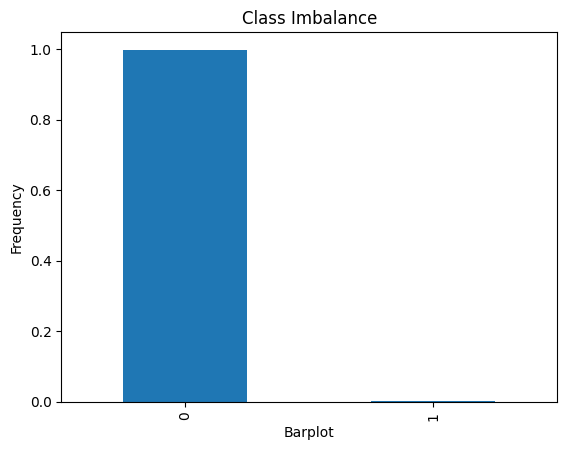

In [ ]:
#The bar chart of fraudulent transactions and normal transactions in isFraud

data['isFraud'].value_counts(normalize = True).plot( kind ='bar', xlabel = 'Barplot', ylabel = 'Frequency', title = 'Class Imbalance');

In [ ]:
#The number of flagged fraudulent transactions and flagged normal transactions in isFlaggedFraud
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

N.B The number of isFlaggedFraud transaction is actually less than the number of isfraud since 1 signifies True and 0 signifies false


In [ ]:
#To explore isFraud column
fraud = data [ data ['isFraud'] == 1]
fraud

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [ ]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [ ]:
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

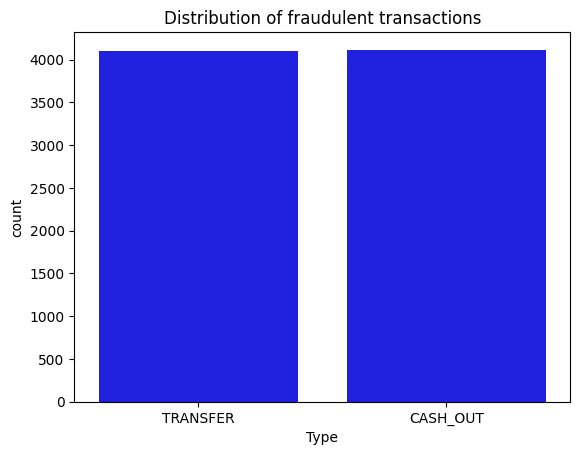

In [ ]:
sns.countplot (data = fraud, x = 'type', color = 'blue')
plt.xlabel('Type')
plt.title('Distribution of fraudulent transactions');

In [ ]:
#The numbers of each attribute value under attribute 'type'
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Cashout and payment account for more than 60% of all online transactions, according to my observations. While debt is the least important

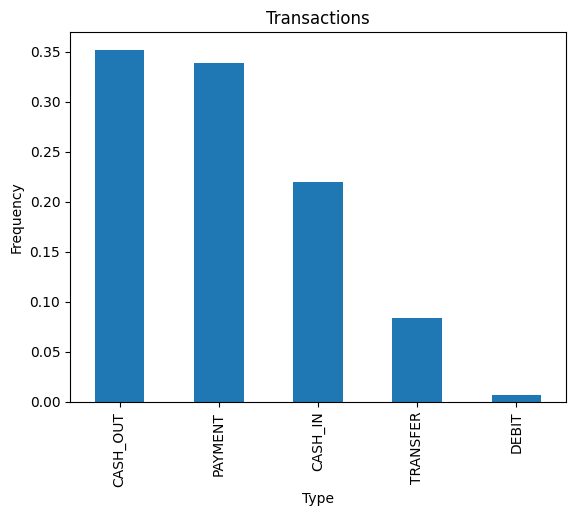

In [ ]:
#A bar chart showing the numbers of each attribute value under attribute 'type'
data['type'].value_counts(normalize = True).plot(kind ='bar', xlabel = 'Type', ylabel = 'Frequency', title = 'Transactions');

In [ ]:
# Mapping the type attributes to their corresponding integers for training and test
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [ ]:
#Defining x and y
x = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = data['isFraud'].values

In [ ]:
#Splitting the into test and train set and checking the shape of x_train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=RANDOM_SEED )
x_train.shape

(5090096, 4)

In [ ]:
#Checking the shape of x_train
y_train.shape

(5090096,)

In [ ]:
# Standardize data based on mean & sd of x_train

mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# **Building up the Autoencoder Network Model**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
# defining the key parameters
batch_size = 4000000000
nb_epoch = 10

In [ ]:
#  Input layer for the encoder
input_encoder = Input(shape=(x.shape[1],), name= "input_encoder")

#  Intermidate layers: one = 100, two = 50
h1 = Dense(100, activation ="tanh", name="encoded_layer1", activity_regularizer=regularizers.l1(10e-5))(input_encoder)
h2 = Dense(50, activation ="relu", name="encoded_layer2")(h1)

#  Describing the mean of the latent space
encoder_out = Dense(50, activation='relu', name="encoder_out")(h2)

#  Describing the encoder as a keras model
encoder = Model(input_encoder, encoder_out, name="encoder")

#  Print out the summary of what was done above
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 4)]               0         
                                                                 
 encoded_layer1 (Dense)      (None, 100)               500       
                                                                 
 encoded_layer2 (Dense)      (None, 50)                5050      
                                                                 
 encoder_out (Dense)         (None, 50)                2550      
                                                                 
Total params: 8,100
Trainable params: 8,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  Input layer for the decoder
input_layer = Input(shape=(50,), name = "input_decoder")

#  Intermidate layers: one = 100, two = 50,
#  Transfering the latent space to the intermidiate dimension
decoded_h1 = Dense(50, activation ="relu", name="decoded_layer1")(input_layer)
decoded_h2 = Dense(100, activation ="relu", name="decoded_layer2")(decoded_h1)

#  Obtaining the mean from the original dimension of x_train(4)
decoder_out = Dense(4, activation='tanh', name="decoder_out")(decoded_h2)

#  Describing the deecoder as a keras model
decoder = Model(input_layer, decoder_out, name="decoder")

#  Print out the summary of what was done above
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_decoder (InputLayer)  [(None, 50)]              0         
                                                                 
 decoded_layer1 (Dense)      (None, 50)                2550      
                                                                 
 decoded_layer2 (Dense)      (None, 100)               5100      
                                                                 
 decoder_out (Dense)         (None, 4)                 404       
                                                                 
Total params: 8,054
Trainable params: 8,054
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  AUTOENCODER

#  Taking the output. Recall, that we need to take the encoder_out
combined_output = decoder(encoder(input_encoder))

#  Connecting the input and the output
autoencoder_output = Model(input_encoder, combined_output)

#  Print out the entire autoencoder's model
autoencoder_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 4)]               0         
                                                                 
 encoder (Functional)        (None, 50)                8100      
                                                                 
 decoder (Functional)        (None, 4)                 8054      
                                                                 
Total params: 16,154
Trainable params: 16,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  Training the model on the balanced data
autoencoder_output.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = autoencoder_output.fit(x_train, x_train, epochs= nb_epoch, batch_size= batch_size, shuffle = True, validation_data =(x_test, x_test), verbose = 1).history



Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.9819 - accuracy: 0.1101 - val_loss: 0.9624 - val_accuracy: 0.5638
Epoch 2/10
1/1 [==============================] - 1s 924ms/step - loss: 0.9513 - accuracy: 0.5633 - val_loss: 0.9336 - val_accuracy: 0.5776
Epoch 3/10
1/1 [==============================] - 1s 904ms/step - loss: 0.9226 - accuracy: 0.5773 - val_loss: 0.9068 - val_accuracy: 0.7697
Epoch 4/10
1/1 [==============================] - 1s 897ms/step - loss: 0.8959 - accuracy: 0.7693 - val_loss: 0.8817 - val_accuracy: 0.8983
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.8709 - accuracy: 0.8983 - val_loss: 0.8565 - val_accuracy: 0.9011
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.8458 - accuracy: 0.9011 - val_loss: 0.8315 - val_accuracy: 0.9031
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.8208 - accuracy: 0.9032 - val_loss: 0.8068 - val_accuracy: 0.9049
Epoch 8/10
1/1 [==============

# **Model Loss and Reconstruction Error**

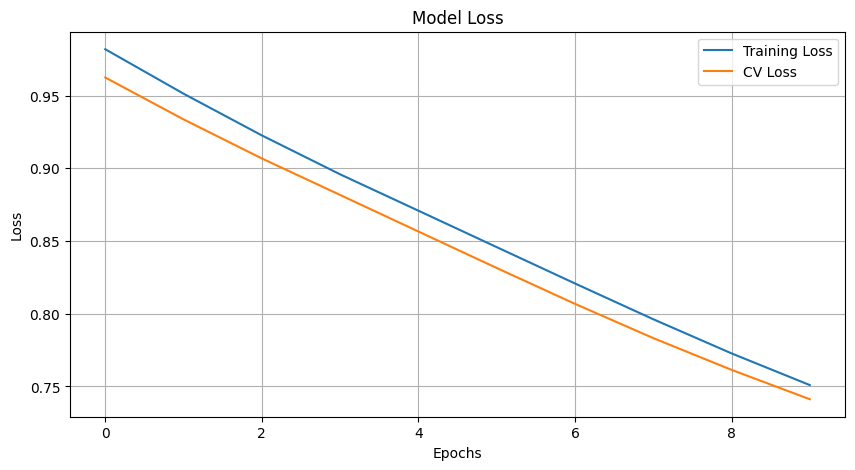

In [ ]:
# Model Loss
plt.figure(figsize = (10,5))
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label = 'CV Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#  Prediction & reconstruction error
predictions = autoencoder_output.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_dataframe = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
print("Full Sample",error_dataframe.describe())
error_dataframe_true = error_dataframe[(error_dataframe['true_class']== 0)]
print("Normal Sample",error_dataframe_true.describe())
error_dataframe_false = error_dataframe[(error_dataframe['true_class']== 1)]
print("Fraud Sample",error_dataframe_false.describe())

# **Visual Analysis**

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve,
                              auc, roc_curve,
                              recall_score, classification_report,
                              f1_score,
                              precision_recall_fscore_support)

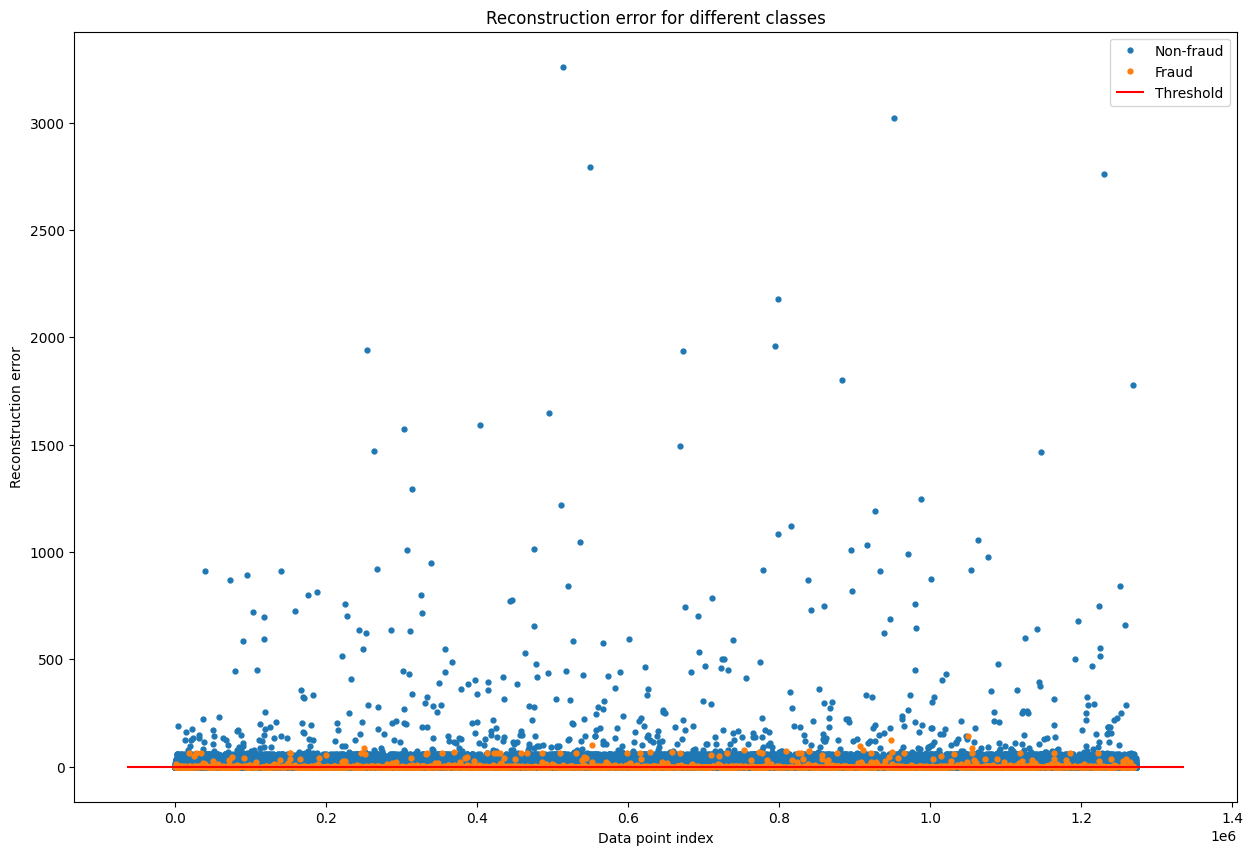

In [ ]:
# scatter plot

threshold = 0.9
groups = error_dataframe.groupby('true_class')
fig, ax = plt.subplots(figsize=(15, 10))


for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Non-fraud")

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

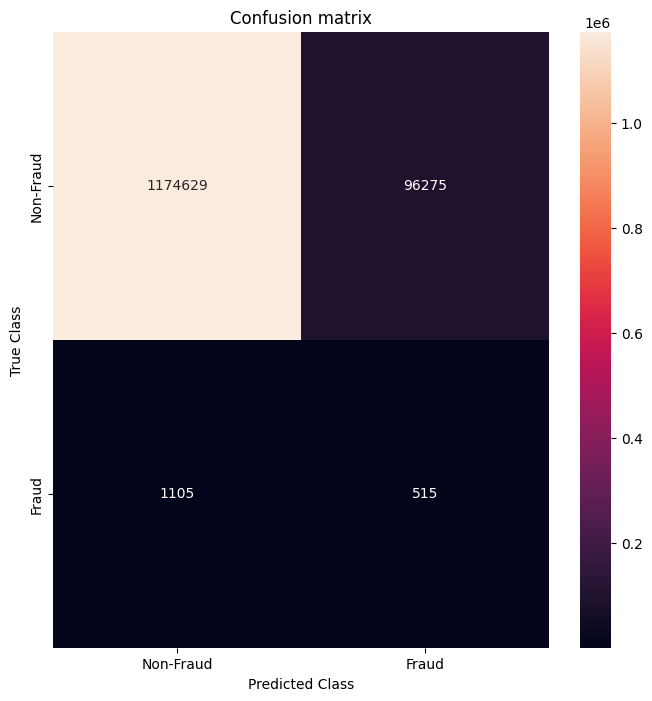

In [ ]:
# confusion matrix
threshold = 0.9
Labels = ["Non-Fraud", "Fraud"]
# And see how well we're dividing the two types of transactions:
groups = error_dataframe.groupby('true_class')

# predict fraud
y_pred = [1 if e > threshold else 0 for e in error_dataframe.reconstruction_error.values]
conf_matrix = confusion_matrix(error_dataframe.true_class, y_pred)

# plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
#
#  Note that: 0 == Non-Fraud and 1 == Fraud;

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270904
           1       0.01      0.32      0.01      1620

    accuracy                           0.92   1272524
   macro avg       0.50      0.62      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524



# **Saving The Autoencoder Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Saving the model on google drive
autoencoder_output.save('/content/drive/MyDrive/Colab Notebooks//Final Year Project/autoenconder_mmodel.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import h5py
# The structure
file_path = '/content/drive/MyDrive/Colab Notebooks//Final Year Project/autoenconder_mmodel.h5'

with h5py.File(file_path, 'r') as file:
    # Print the structure of the HDF5 file
    print("File structure:")
    print(file)


File structure:
<HDF5 file "autoenconder_mmodel.h5" (mode r)>


In [ ]:
import h5py
# Load the model HDF5  file
with h5py.File('/content/drive/MyDrive/Colab Notebooks//Final Year Project/autoenconder_mmodel.h5', 'r') as file:
    # Use dir() on the loaded HDF5 file object
    print(dir(file))


['_MutableMapping__marker', '__abstractmethods__', '__bool__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_d', '_e', '_gcpl_crt_order', '_id', '_ipython_key_completions_', '_lapl', '_lcpl', '_libver', 'attrs', 'build_virtual_dataset', 'clear', 'close', 'copy', 'create_dataset', 'create_dataset_like', 'create_group', 'create_virtual_dataset', 'driver', 'file', 'filename', 'flush', 'get', 'id', 'items', 'keys', 'libver', 'meta_block_size', 'mode', 'move', 'name', 'parent', '

In [ ]:
print("File uploaded successfully!")

File uploaded successfully!
